In [1]:
!pip install opencv-python
!pip install matplotlib
!pip install tensorflow==2.1.0
!pip install pillow

distutils: c:\programdata\anaconda3\Include\UNKNOWN
sysconfig: c:\programdata\anaconda3\Include
user = False
home = None
root = None
prefix = None
distutils: c:\programdata\anaconda3\Include\UNKNOWN
sysconfig: c:\programdata\anaconda3\Include
user = False
home = None
root = None
prefix = None
You should consider upgrading via the 'c:\programdata\anaconda3\python.exe -m pip install --upgrade pip' command.


distutils: c:\programdata\anaconda3\Include\UNKNOWN
sysconfig: c:\programdata\anaconda3\Include
user = False
home = None
root = None
prefix = None
distutils: c:\programdata\anaconda3\Include\UNKNOWN
sysconfig: c:\programdata\anaconda3\Include
user = False
home = None
root = None
prefix = None
You should consider upgrading via the 'c:\programdata\anaconda3\python.exe -m pip install --upgrade pip' command.


distutils: c:\programdata\anaconda3\Include\UNKNOWN
sysconfig: c:\programdata\anaconda3\Include
user = False
home = None
root = None
prefix = None
distutils: c:\programdata\anaconda3\Include\UNKNOWN
sysconfig: c:\programdata\anaconda3\Include
user = False
home = None
root = None
prefix = None
You should consider upgrading via the 'c:\programdata\anaconda3\python.exe -m pip install --upgrade pip' command.


distutils: c:\programdata\anaconda3\Include\UNKNOWN
sysconfig: c:\programdata\anaconda3\Include
user = False
home = None
root = None
prefix = None
distutils: c:\programdata\anaconda3\Include\UNKNOWN
sysconfig: c:\programdata\anaconda3\Include
user = False
home = None
root = None
prefix = None
You should consider upgrading via the 'c:\programdata\anaconda3\python.exe -m pip install --upgrade pip' command.


In [1]:
import os
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import tensorflow_model_optimization as tfmot

In [2]:
print(tf.__version__)

2.4.1


In [2]:
train_dir = os.path.join('detecion')
train_a_dir = os.path.join(train_dir, 'a')
train_b_dir = os.path.join(train_dir, 'b')
train_c_dir = os.path.join(train_dir, 'c')
train_d_dir = os.path.join(train_dir, 'd')
train_e_dir = os.path.join(train_dir, 'e')
train_f_dir = os.path.join(train_dir, 'f')
train_g_dir = os.path.join(train_dir, 'g')
train_h_dir = os.path.join(train_dir, 'h')
train_i_dir = os.path.join(train_dir, 'i')
train_j_dir = os.path.join(train_dir, 'j')
train_k_dir = os.path.join(train_dir, 'k')
train_l_dir = os.path.join(train_dir, 'l')
train_m_dir = os.path.join(train_dir, 'm')
train_n_dir = os.path.join(train_dir, 'n')
train_o_dir = os.path.join(train_dir, 'o')
train_p_dir = os.path.join(train_dir, 'p')
train_q_dir = os.path.join(train_dir, 'q')
train_r_dir = os.path.join(train_dir, 'r')
train_s_dir = os.path.join(train_dir, 's')
train_t_dir = os.path.join(train_dir, 't')
train_u_dir = os.path.join(train_dir, 'u')
train_v_dir = os.path.join(train_dir, 'v')
train_w_dir = os.path.join(train_dir, 'w')
train_x_dir = os.path.join(train_dir, 'x')
train_y_dir = os.path.join(train_dir, 'y')
train_z_dir = os.path.join(train_dir, 'z')


In [4]:
train_a_fnames = os.listdir(train_a_dir)

print(train_a_fnames[:10])


['a.00690942-a0c5-11eb-9f03-9cb6d0638740.jpg', 'a.019f5386-a0c5-11eb-a233-9cb6d0638740.jpg', 'a.02d58724-a0c5-11eb-b47b-9cb6d0638740.jpg', 'a.040baa7e-a0c5-11eb-81d2-9cb6d0638740.jpg', 'a.054049da-a0c5-11eb-9f40-9cb6d0638740.jpg', 'a.06775c30-a0c5-11eb-9d18-9cb6d0638740.jpg', 'a.07acd5b4-a0c5-11eb-96cf-9cb6d0638740.jpg', 'a.08e34858-a0c5-11eb-8261-9cb6d0638740.jpg', 'a.0a185f76-a0c5-11eb-9cc4-9cb6d0638740.jpg', 'a.0b4dce58-a0c5-11eb-be77-9cb6d0638740.jpg']


In [5]:
print('Total imagenes a:', len(train_a_fnames))


Total imagenes a: 587


In [5]:
img_height = 160
img_width = 160
batch_size = 32
IMG_SIZE =(img_height,img_width)

In [6]:

preprocess_input = (tf.keras.applications.mobilenet_v2.preprocess_input)
    

rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset = -1)

rescale = tfmot.quantization.keras.quantize_annotate_layer(rescale)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                                  shear_range=0.2,
                                  preprocessing_function=preprocess_input,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  validation_split=0.2)
train_dataset = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (img_height, img_width),
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    subset='training')
validation_dataset = train_datagen.flow_from_directory(train_dir,
                                                        target_size=(img_height,img_width),
                                                        batch_size=batch_size,
                                                        class_mode='categorical',
                                                        subset='validation')



Found 12148 images belonging to 26 classes.
Found 3024 images belonging to 26 classes.


In [8]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape= IMG_SHAPE,
                                               include_top=False,
                                               weights= 'imagenet')

In [9]:
cont = 0
for layers in base_model.layers:
    print(cont)
    print(layers.name)
    cont = cont +1

0
input_1
1
Conv1
2
bn_Conv1
3
Conv1_relu
4
expanded_conv_depthwise
5
expanded_conv_depthwise_BN
6
expanded_conv_depthwise_relu
7
expanded_conv_project
8
expanded_conv_project_BN
9
block_1_expand
10
block_1_expand_BN
11
block_1_expand_relu
12
block_1_pad
13
block_1_depthwise
14
block_1_depthwise_BN
15
block_1_depthwise_relu
16
block_1_project
17
block_1_project_BN
18
block_2_expand
19
block_2_expand_BN
20
block_2_expand_relu
21
block_2_depthwise
22
block_2_depthwise_BN
23
block_2_depthwise_relu
24
block_2_project
25
block_2_project_BN
26
block_2_add
27
block_3_expand
28
block_3_expand_BN
29
block_3_expand_relu
30
block_3_pad
31
block_3_depthwise
32
block_3_depthwise_BN
33
block_3_depthwise_relu
34
block_3_project
35
block_3_project_BN
36
block_4_expand
37
block_4_expand_BN
38
block_4_expand_relu
39
block_4_depthwise
40
block_4_depthwise_BN
41
block_4_depthwise_relu
42
block_4_project
43
block_4_project_BN
44
block_4_add
45
block_5_expand
46
block_5_expand_BN
47
block_5_expand_relu
48
b

In [46]:

inputs = tf.keras.Input(shape=(160,160,3))
x1=base_model.layers[1](inputs,training=False)
x2=base_model.layers[2](x1,training=False)
x3=base_model.layers[3](x2,training=False)
x4=base_model.layers[4](x3,training=False)
x5=base_model.layers[5](x4,training=False)
x6=base_model.layers[6](x5,training=False)
x7=base_model.layers[7](x6,training=False)
x8=base_model.layers[8](x7,training=False)
x9=base_model.layers[9](x8,training=False)
x10=base_model.layers[10](x9,training=False)
x11=base_model.layers[11](x10,training=False)
x12=base_model.layers[12](x11,training=False)
x13=base_model.layers[13](x12,training=False)
x14=base_model.layers[14](x13,training=False)
x15=base_model.layers[15](x14,training=False)
x16=base_model.layers[16](x15,training=False)
x17=base_model.layers[17](x16,training=False)
x18=base_model.layers[18](x17,training=False)
x19=base_model.layers[19](x18,training=False)
x20=base_model.layers[20](x19,training=False)
x21=base_model.layers[21](x20,training=False)
x22=base_model.layers[22](x21,training=False)
x23=base_model.layers[23](x22,training=False)
x24=base_model.layers[24](x23,training=False)
x25=base_model.layers[25](x24,training=False)
x26=base_model.layers[26]([x25,x17],training=False)
x27=base_model.layers[27](x26,training=False)
x28=base_model.layers[28](x27,training=False)
x29=base_model.layers[29](x28,training=False)
x30=base_model.layers[30](x29,training=False)
x31=base_model.layers[31](x30,training=False)
x32=base_model.layers[32](x31,training=False)
x33=base_model.layers[33](x32,training=False)
x34=base_model.layers[34](x33,training=False)
x35=base_model.layers[35](x34,training=False)
x36=base_model.layers[36](x35,training=False)
x37=base_model.layers[37](x36,training=False)
x38=base_model.layers[38](x37,training=False)
x39=base_model.layers[39](x38,training=False)
x40=base_model.layers[40](x39,training=False)
x41=base_model.layers[41](x40,training=False)
x42=base_model.layers[42](x41,training=False)
x43=base_model.layers[43](x42,training=False)
x44=base_model.layers[44]([x43,x35],training=False)
x45=base_model.layers[45](x44,training=False)
x46=base_model.layers[46](x45,training=False)
x47=base_model.layers[47](x46,training=False)
x48=base_model.layers[48](x47,training=False)
x49=base_model.layers[49](x48,training=False)
x50=base_model.layers[50](x49,training=False)
x51=base_model.layers[51](x50,training=False)
x52=base_model.layers[52](x51,training=False)
x53=base_model.layers[53]([x52,x44],training=False)
x54=base_model.layers[54](x53,training=False)
x55=base_model.layers[55](x54,training=False)
x56=base_model.layers[56](x55,training=False)
x57=base_model.layers[57](x56,training=False)
x58=base_model.layers[58](x57,training=False)
x59=base_model.layers[59](x58,training=False)
x60=base_model.layers[60](x59,training=False)
x61=base_model.layers[61](x60,training=False)
x62=base_model.layers[62](x61,training=False)
x63=base_model.layers[63](x62,training=False)
x64=base_model.layers[64](x63,training=False)
x65=base_model.layers[65](x64,training=False)
x66=base_model.layers[66](x65,training=False)
x67=base_model.layers[67](x66,training=False)
x68=base_model.layers[68](x67,training=False)
x69=base_model.layers[69](x68,training=False)
x70=base_model.layers[70](x69,training=False)
x71=base_model.layers[71]([x70,x62],training=False)
x72=base_model.layers[72](x71,training=False)
x73=base_model.layers[73](x72,training=False)
x74=base_model.layers[74](x73,training=False)
x75=base_model.layers[75](x74,training=False)
x76=base_model.layers[76](x75,training=False)
x77=base_model.layers[77](x76,training=False)
x78=base_model.layers[78](x77,training=False)
x79=base_model.layers[79](x78,training=False)
x80=base_model.layers[80]([x79,x71],training=False)
x81=base_model.layers[81](x80,training=False)
x82=base_model.layers[82](x81,training=False)
x83=base_model.layers[83](x82,training=False)
x84=base_model.layers[84](x83,training=False)
x85=base_model.layers[85](x84,training=False)
x86=base_model.layers[86](x85,training=False)
x87=base_model.layers[87](x86,training=False)
x88=base_model.layers[88](x87,training=False)
x89=base_model.layers[89]([x88,x80],training=False)
x90=base_model.layers[90](x89,training=False)
x91=base_model.layers[91](x90,training=False)
x92=base_model.layers[92](x91,training=False)
x93=base_model.layers[93](x92,training=False)
x94=base_model.layers[94](x93,training=False)
x95=base_model.layers[95](x94,training=False)
x96=base_model.layers[96](x95,training=False)
x97=base_model.layers[97](x96,training=False)
x98=base_model.layers[98](x97,training=False)
x99=base_model.layers[99](x98,training=False)
x100=base_model.layers[100](x99,training=False)
x101=base_model.layers[101](x100,training=False)
x102=base_model.layers[102](x101,training=False)
x103=base_model.layers[103](x102,training=False)
x104=base_model.layers[104](x103,training=False)
x105=base_model.layers[105](x104,training=False)
x106=base_model.layers[106]([x105,x97],training=False)
x107=base_model.layers[107](x106,training=False)
x108=base_model.layers[108](x107,training=False)
x109=base_model.layers[109](x108,training=False)
x110=base_model.layers[110](x109,training=False)
x111=base_model.layers[111](x110,training=False)
x112=base_model.layers[112](x111,training=False)
x113=base_model.layers[113](x112,training=False)
x114=base_model.layers[114](x113,training=False)
x115=base_model.layers[115]([x114,x106],training=False)
x116=base_model.layers[116](x115,training=False)
x117=base_model.layers[117](x116,training=False)
x118=base_model.layers[118](x117,training=False)
x119=base_model.layers[119](x118,training=False)
x120=base_model.layers[120](x119,training=False)
x121=base_model.layers[121](x120,training=False)
x122=base_model.layers[122](x121,training=False)
x123=base_model.layers[123](x122,training=False)
x124=base_model.layers[124](x123,training=False)
x125=base_model.layers[125](x124,training=False)
x126=base_model.layers[126](x125,training=False)
x127=base_model.layers[127](x126,training=False)
x128=base_model.layers[128](x127,training=False)
x129=base_model.layers[129](x128,training=False)
x130=base_model.layers[130](x129,training=False)
x131=base_model.layers[131](x130,training=False)
x132=base_model.layers[132](x131,training=False)
x133=base_model.layers[133]([x132,x124],training=False)
x134=base_model.layers[134](x133,training=False)
x135=base_model.layers[135](x134,training=False)
x136=base_model.layers[136](x135,training=False)
x137=base_model.layers[137](x136,training=False)
x138=base_model.layers[138](x137,training=False)
x139=base_model.layers[139](x138,training=False)
x140=base_model.layers[140](x139,training=False)
x141=base_model.layers[141](x140,training=False)
x142=base_model.layers[142]([x141,x133],training=False)
x143=base_model.layers[143](x142,training=False)
x144=base_model.layers[144](x143,training=False)
x145=base_model.layers[145](x144,training=False)
x146=base_model.layers[146](x145,training=False)
x147=base_model.layers[147](x146,training=False)
x148=base_model.layers[148](x147,training=False)
x149=base_model.layers[149](x148,training=False)
x150=base_model.layers[150](x149,training=False)
x151=base_model.layers[151](x150,training=False)
x152=base_model.layers[152](x151,training=False)
x153=base_model.layers[153](x152,training=False)

print(base_model.layers[153].name)
print(x133.name)


out_relu
block_14_add/add:0


In [40]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1280)


In [41]:
base_model.trainable = False

quant_aware_bmodel = tfmot.quantization.keras.quantize_model(base_model)
print(type(quant_aware_bmodel))
base_model.summary()


<class 'tensorflow.python.keras.engine.functional.Functional'>
Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 80, 80, 32)   0           bn_Conv1[0][0]                   
________________

In [42]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
#global_average_layer = tfmot.quantization.keras.quantize_annotate_layer(global_average_layer)
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [43]:
prediction_layer = tf.keras.layers.Dense(26,activation = 'softmax')
#prediction_layer = tfmot.quantization.keras.quantize_annotate_layer(prediction_layer)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 26)


In [44]:
drop = tf.keras.layers.Dropout(0.2)
drop = tfmot.quantization.keras.quantize_annotate_layer(drop)

In [47]:
x=(global_average_layer)(x153)
x=(tf.keras.layers.Dropout(0.2))(x)
outputs =(prediction_layer)(x)
model = tf.keras.Model(inputs,outputs)

model = tfmot.quantization.keras.quantize_model(model)


In [23]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.0001),
             loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
             metrics=['accuracy', tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

In [18]:

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
quantize_layer_1 (QuantizeLayer (None, 160, 160, 3)  3           input_2[0][0]                    
__________________________________________________________________________________________________
quant_Conv1 (QuantizeWrapper)   (None, 80, 80, 32)   929         quantize_layer_1[1][0]           
__________________________________________________________________________________________________
quant_bn_Conv1 (QuantizeWrapper (None, 80, 80, 32)   129         quant_Conv1[0][0]                
______________________________________________________________________________________________

In [24]:
nb_epochs = 50
history = model.fit_generator(
    train_dataset,
    steps_per_epoch= train_dataset.samples // batch_size,
    validation_data=validation_dataset,
    validation_steps= validation_dataset.samples // batch_size,
    epochs=nb_epochs)

C:\Users\NICOLAS\.conda\envs\tfod\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
379/379 [==============================] - 774s 2s/step - loss: 2.7557 - accuracy: 0.1765 - recall_1: 0.0550 - precision: 0.4940 - val_loss: 1.1460 - val_accuracy: 0.6323 - val_recall_1: 0.5063 - val_precision: 0.7585
Epoch 2/50
379/379 [==============================] - 616s 2s/step - loss: 0.4182 - accuracy: 0.8662 - recall_1: 0.8126 - precision: 0.9159 - val_loss: 0.6149 - val_accuracy: 0.8215 - val_recall_1: 0.7856 - val_precision: 0.8624
Epoch 3/50
379/379 [==============================] - 620s 2s/step - loss: 0.1383 - accuracy: 0.9564 - recall_1: 0.9463 - precision: 0.9647 - val_loss: 0.4455 - val_accuracy: 0.8690 - val_recall_1: 0.8531 - val_precision: 0.8985
Epoch 4/50
379/379 [==============================] - 623s 2s/step - loss: 0.0820 - accuracy: 0.9759 - recall_1: 0.9726 - precision: 0.9806 - val_loss: 0.4409 - val_accuracy: 0.8710 - val_recall_1: 0.8587 - val_precision: 0.8922
Epoch 5/50
379/379 [==============================] - 628s 2s/step - loss: 0.0595 - 

Epoch 37/50
379/379 [==============================] - 634s 2s/step - loss: 0.0124 - accuracy: 0.9962 - recall_1: 0.9959 - precision: 0.9965 - val_loss: 0.2855 - val_accuracy: 0.9355 - val_recall_1: 0.9338 - val_precision: 0.9385
Epoch 38/50
379/379 [==============================] - 637s 2s/step - loss: 0.0118 - accuracy: 0.9965 - recall_1: 0.9960 - precision: 0.9971 - val_loss: 0.4890 - val_accuracy: 0.9072 - val_recall_1: 0.9056 - val_precision: 0.9113
Epoch 39/50
379/379 [==============================] - 632s 2s/step - loss: 0.0274 - accuracy: 0.9916 - recall_1: 0.9905 - precision: 0.9924 - val_loss: 0.4129 - val_accuracy: 0.9122 - val_recall_1: 0.9082 - val_precision: 0.9183
Epoch 40/50
379/379 [==============================] - 634s 2s/step - loss: 0.0125 - accuracy: 0.9962 - recall_1: 0.9958 - precision: 0.9963 - val_loss: 0.3606 - val_accuracy: 0.9162 - val_recall_1: 0.9129 - val_precision: 0.9175
Epoch 41/50
379/379 [==============================] - 633s 2s/step - loss: 0.00

In [27]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

rec = history.history['recall_1']
val_rec = history.history['val_recall_1']

prec= history.history['precision']
val_prec= history.history['val_precision']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))






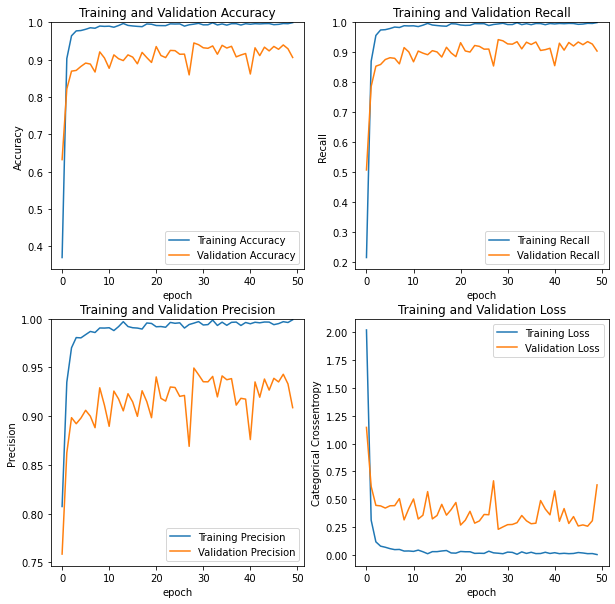

In [36]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoch')

plt.subplot(2,2,2)
plt.plot(rec, label='Training Recall')
plt.plot(val_rec, label='Validation Recall')
plt.legend(loc='lower right')
plt.ylabel('Recall')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Recall')
plt.xlabel('epoch')

plt.subplot(2,2,3)
plt.plot(prec, label='Training Precision')
plt.plot(val_prec, label='Validation Precision')
plt.legend(loc='lower right')
plt.ylabel('Precision')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Precision')
plt.xlabel('epoch')

plt.subplot(2,2,4)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Categorical Crossentropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.savefig('Modelo_cuantizado')
plt.show()



In [34]:
print('Accuracy',acc[-1])
print('Validation Accuracy',val_acc[-1])

print('Recall',rec[-1])
print('Validation Recall',val_rec[-1])

print('Precision',prec[-1])
print('Validation Precision',val_prec[-1])

print('Loss',loss[-1])
print('Validation Loss',val_loss[-1])


Accuracy 0.9987619519233704
Validation Accuracy 0.9055851101875305
Recall 0.9987619519233704
Validation Recall 0.9035904407501221
Precision 0.9989268779754639
Validation Precision 0.908726155757904
Loss 0.0036350160371512175
Validation Loss 0.6295504570007324


In [51]:
from tensorflow.keras.preprocessing import image
from PIL import Image

ValueError: in user code:

    C:\Users\NICOLAS\.conda\envs\tfod\lib\site-packages\tensorflow\python\keras\engine\training.py:1478 predict_function  *
        return step_function(self, iterator)
    C:\Users\NICOLAS\.conda\envs\tfod\lib\site-packages\tensorflow\python\keras\engine\training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\NICOLAS\.conda\envs\tfod\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\NICOLAS\.conda\envs\tfod\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\NICOLAS\.conda\envs\tfod\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\NICOLAS\.conda\envs\tfod\lib\site-packages\tensorflow\python\keras\engine\training.py:1461 run_step  **
        outputs = model.predict_step(data)
    C:\Users\NICOLAS\.conda\envs\tfod\lib\site-packages\tensorflow\python\keras\engine\training.py:1434 predict_step
        return self(x, training=False)
    C:\Users\NICOLAS\.conda\envs\tfod\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\NICOLAS\.conda\envs\tfod\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:271 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) +

    ValueError: Input 0 is incompatible with layer model: expected shape=(None, 160, 160, 3), found shape=(None, 150, 150, 3)


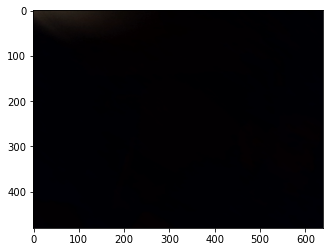

In [52]:
vc = cv2.VideoCapture(0)
plt.ion()

if vc.isOpened():
    is_capturing, frame = vc.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    webcam_preview = plt.imshow(frame)
else:
    is_capturing = False

while is_capturing:
    try:
        is_capturing, frame = vc.read()
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame_res = cv2.resize(frame, dsize=(150,150),interpolation=cv2.INTER_CUBIC)
        x=image.img_to_array(frame_res)
        x=np.expand_dims(x, axis=0)
        images = np.vstack([x])
        classes = model.predict(images, batch_size=10)
        if classes[0]>0:
            print("No Lleva mascara")
        else:
            print("Si lleva mascara")
        webcam_preview = plt.imshow(frame)
        try:
            plt.pause(1)
        except Exception:
            pass
    except KeyboardInterrupt:
        vc.release()
    

In [37]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\NICOLAS\AppData\Local\Temp\tmpm7pbcxfo\assets


INFO:tensorflow:Assets written to: C:\Users\NICOLAS\AppData\Local\Temp\tmpm7pbcxfo\assets


In [38]:
open("se_classifier_quant2.tflite","wb").write(tflite_model)

2740048